# GRAPHES : quelques problèmes à résoudre

Dans un graphe, certaines questions simples doivent pouvoir être traitées (et programmées!)
* existe-t-il un chemin entre un sommet A et un sommet B ?
* quels sont les sommets accessibles depuis le  sommet  A ?
* quelle est la distance entre deux sommets?
*  existe-t-il un cycle partant de A, et revenant vers A? 
* etc...

### Existe-t-il un chemin entre A et B ?

Si la réponse est : OUI
* il suffit construire un chemin dans le graphe allant de A à B

Si la réponse est : NON
*  on doit pouvoir s'assurer qu'aucun chemin partant de A n'arrive jusqu'à B... pour cela il faudrait pouvoir essayer tous les chemins possibles!

On va donc d'abord chercher comment **parcourir un graphe** à partir d'un sommet. 

# Parcours en largeur d'abord

#### Graphe exemple

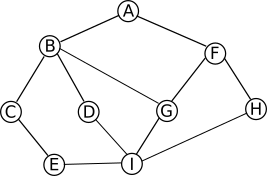

Le principe du parcours en largeur d'abord est de selectionner 
* un sommet de départ
* ensuite : les voisins du sommet de départ
* puis : les voisins de ces voisins
* etc... en évitant de "revenir en arrière"

#### Exemple
en partant du sommet A dans le graphe exemple, un parcours en largeur pourra être:


```
# distance 0 depuis A
A  
# distance 1 depuis A
B  F
# distance 2 depuis A
C  D  G  H 
# distance 3 depuis A
E  I
```

Remarque : l'ordre est arbitraire entre les sommets situés à la même distance de A !


#### Graphe Exemple en Python

In [2]:
class Graphe:
    ''' graphe représenté par un dictionnaire d'adjacence'''
    def __init__(self):
        self.dico = {}
    
    def ajouter_sommet(self,s):
        if s not in self.dico:
            self.dico[s] = []
    
    def ajouter_arc(self,s1,s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        self.dico[s1].append(s2)
    
    def ajouter_arete(self,s1,s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        self.dico[s1].append(s2)
        self.dico[s2].append(s1)
    
    def arc(self,s1,s2):
        return s2 in self.dico[s1]
    
    def sommets(self):
        return list(self.dico)

    def voisins(self,s):
        return self.dico[s]
    
graphex = Graphe()
graphex.ajouter_arete('A','B')
graphex.ajouter_arete('A','F')
graphex.ajouter_arete('B','C')
graphex.ajouter_arete('B','D')
graphex.ajouter_arete('B','G')
graphex.ajouter_arete('F','G')
graphex.ajouter_arete('F','H')
graphex.ajouter_arete('C','E')
graphex.ajouter_arete('E','I')
graphex.ajouter_arete('D','I')
graphex.ajouter_arete('G','I')
graphex.ajouter_arete('H','I')



#### 1) Parcours en largeur (avec deux listes)

In [3]:
def parcours_largeur(g,depart):
    '''parcours en largeur d'un graphe g depuis un sommet depart
    la fonction renvoie un dictionnaire avec
    - comme clés : les sommets accessibles depuis le sommet depart
    - comme valeurs : la distance au sommet depart'''
    print(depart)
    dist = {depart:0}
    courant = [depart]  # liste des sommets à une distance 'n'
    suivant = []        # liste des sommets à une distance 'n+1'
    while len(courant)>0:
        s = courant.pop()  #on retire un sommet à la distance n
        # la liste 'courant' est utilisée comme une PILE
        for v in g.voisins(s): 
            if v not in dist:
                #  v (voisin de s) est inscrit dans le dictionnaire
                dist[v] = dist[s] + 1 
                # et on ajoute v dans 'suivant'
                suivant.append(v)
                print(v)  # à décommenter pour affichage
        # si on a épuisé tous les sommets de 'courant', 
        # on passe à la distance n+1
        if len(courant)==0:
            suivant.reverse()  # juste pour l'esthétique... on reverse la pile
            courant = suivant
            suivant = []
    return dist

print(parcours_largeur(graphex,'I'))

I
E
D
G
H
C
B
F
A
{'I': 0, 'E': 1, 'D': 1, 'G': 1, 'H': 1, 'C': 2, 'B': 2, 'F': 2, 'A': 3}


#### Graphe exemple

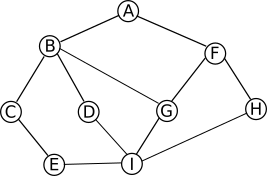

[visualiser sur PythonTutor](https://pythontutor.com/visualize.html#code=class%20Graphe%3A%0A%20%20%20%20'''%20graphe%20repr%C3%A9sent%C3%A9%20par%20un%20dictionnaire%20d'adjacence'''%0A%20%20%20%20def%20__init__%28self%29%3A%0A%20%20%20%20%20%20%20%20self.dico%20%3D%20%7B%7D%0A%20%20%20%20%0A%20%20%20%20def%20ajouter_sommet%28self,s%29%3A%0A%20%20%20%20%20%20%20%20if%20s%20not%20in%20self.dico%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20self.dico%5Bs%5D%20%3D%20%5B%5D%0A%20%20%20%20%0A%20%20%20%20def%20ajouter_arc%28self,s1,s2%29%3A%0A%20%20%20%20%20%20%20%20self.ajouter_sommet%28s1%29%0A%20%20%20%20%20%20%20%20self.ajouter_sommet%28s2%29%0A%20%20%20%20%20%20%20%20self.dico%5Bs1%5D.append%28s2%29%0A%20%20%20%20%0A%20%20%20%20def%20ajouter_arete%28self,s1,s2%29%3A%0A%20%20%20%20%20%20%20%20self.ajouter_sommet%28s1%29%0A%20%20%20%20%20%20%20%20self.ajouter_sommet%28s2%29%0A%20%20%20%20%20%20%20%20self.dico%5Bs1%5D.append%28s2%29%0A%20%20%20%20%20%20%20%20self.dico%5Bs2%5D.append%28s1%29%0A%20%20%20%20%0A%20%20%20%20def%20arc%28self,s1,s2%29%3A%0A%20%20%20%20%20%20%20%20return%20s2%20in%20self.dico%5Bs1%5D%0A%20%20%20%20%0A%20%20%20%20def%20sommets%28self%29%3A%0A%20%20%20%20%20%20%20%20return%20list%28self.dico%29%0A%0A%20%20%20%20def%20voisins%28self,s%29%3A%0A%20%20%20%20%20%20%20%20return%20self.dico%5Bs%5D%0A%20%20%20%20%0Agraphex%20%3D%20Graphe%28%29%0Agraphex.ajouter_arete%28'A','B'%29%0Agraphex.ajouter_arete%28'A','F'%29%0Agraphex.ajouter_arete%28'B','C'%29%0Agraphex.ajouter_arete%28'B','D'%29%0Agraphex.ajouter_arete%28'B','G'%29%0Agraphex.ajouter_arete%28'F','G'%29%0Agraphex.ajouter_arete%28'F','H'%29%0Agraphex.ajouter_arete%28'C','E'%29%0Agraphex.ajouter_arete%28'E','I'%29%0Agraphex.ajouter_arete%28'D','I'%29%0Agraphex.ajouter_arete%28'G','I'%29%0Agraphex.ajouter_arete%28'H','I'%29%0A%0Adef%20parcours_largeur%28g,depart%29%3A%0A%20%20%20%20'''parcours%20en%20largeur%20d'un%20graphe%20g%20depuis%20un%20sommet%20depart%0A%20%20%20%20la%20fonction%20renvoie%20un%20dictionnaire%20avec%0A%20%20%20%20-%20comme%20cl%C3%A9s%20%3A%20les%20sommets%20accessibles%20depuis%20le%20sommet%20depart%0A%20%20%20%20-%20comme%20valeurs%20%3A%20la%20distance%20au%20sommet%20depart'''%0A%20%20%20%20dist%20%3D%20%7Bdepart%3A0%7D%0A%20%20%20%20courant%20%3D%20%5Bdepart%5D%20%20%23%20liste%20des%20sommets%20%C3%A0%20une%20distance%20'n'%0A%20%20%20%20suivant%20%3D%20%5B%5D%20%20%20%20%20%20%20%20%23%20liste%20des%20sommets%20%C3%A0%20une%20distance%20'n%2B1'%0A%20%20%20%20while%20len%28courant%29%3E0%3A%0A%20%20%20%20%20%20%20%20s%20%3D%20courant.pop%28%29%20%20%23on%20retire%20un%20sommet%20%C3%A0%20la%20distance%20n%0A%20%20%20%20%20%20%20%20%23%20la%20liste%20'courant'%20est%20utilis%C3%A9e%20comme%20une%20PILE%0A%20%20%20%20%20%20%20%20for%20v%20in%20g.voisins%28s%29%3A%20%0A%20%20%20%20%20%20%20%20%20%20%20%20if%20v%20not%20in%20dist%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23%20%20v%20%28voisin%20de%20s%29%20est%20inscrit%20dans%20le%20dictionnaire%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20dist%5Bv%5D%20%3D%20dist%5Bs%5D%20%2B%201%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23%20et%20on%20ajoute%20v%20dans%20'suivant'%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20suivant.append%28v%29%0A%20%20%20%20%20%20%20%20%23%20si%20on%20a%20%C3%A9puis%C3%A9%20tous%20les%20sommets%20de%20'courant',%20%0A%20%20%20%20%20%20%20%20%23%20on%20passe%20%C3%A0%20la%20distance%20n%2B1%0A%20%20%20%20%20%20%20%20if%20len%28courant%29%3D%3D0%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20suivant.reverse%28%29%20%20%23%20juste%20pour%20l'esth%C3%A9tique...%20on%20reverse%20la%20pile%0A%20%20%20%20%20%20%20%20%20%20%20%20courant%20%3D%20suivant%0A%20%20%20%20%20%20%20%20%20%20%20%20suivant%20%3D%20%5B%5D%0A%20%20%20%20return%20dist%0A%0Aprint%28parcours_largeur%28graphex,'I'%29%29&cumulative=false&curInstr=171&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

On pourra cacher les variables `graphex, g, Graphe, parcours_largeur`  
et sélectionner uniquement les lignes : 53, 56, 58, 60, 63, 64, 65, 66

On peut commenter / décommenter l'instruction d'affichage, pour visualiser ou non l'ordre dans lequel sont parcourus les sommets : `print(v)`

=> effectuer le suivi des variables lors de l'exécution de `parcours_largeur(graphex,'I')`
#### affichage suivi des variables

In [5]:
def parcours_largeur(g,depart):
    '''parcours en largeur d'un graphe g depuis un sommet depart
    la fonction renvoie un dictionnaire avec
    - comme clés : les sommets accessibles depuis le sommet depart
    - comme valeurs : la distance au sommet depart'''
    dist = {depart:0}
    courant = [depart]  # liste des sommets à une distance 'n'
    suivant = []        # liste des sommets à une distance 'n+1'
    print('courant             | suivant             | s| v|  dist')
    while len(courant)>0:
        s = courant.pop()  #on retire un sommet à la distance n
        # la liste 'courant' est utilisée comme une PILE
        for v in g.voisins(s): 
            if v not in dist:
                #  v (voisin de s) est inscrit dans le dictionnaire
                dist[v] = dist[s] + 1 
                # et on ajoute v dans 'suivant'
                suivant.append(v)
            print(f'{str(courant):20}| {str(suivant):20}| {s}| {v}| {dist}')
        # si on a épuisé tous les sommets de 'courant', 
        # on passe à la distance n+1
        if len(courant)==0:
            suivant.reverse()  # juste pour l'esthétique... on reverse la pile
            courant = suivant
            suivant = []
            print(f'{str(courant):20}| {str(suivant):20}| {s}| {v}| {dist}')
    return dist

print(parcours_largeur(graphex,'I'))

courant             | suivant             | s| v|  dist
[]                  | ['E']               | I| E| {'I': 0, 'E': 1}
[]                  | ['E', 'D']          | I| D| {'I': 0, 'E': 1, 'D': 1}
[]                  | ['E', 'D', 'G']     | I| G| {'I': 0, 'E': 1, 'D': 1, 'G': 1}
[]                  | ['E', 'D', 'G', 'H']| I| H| {'I': 0, 'E': 1, 'D': 1, 'G': 1, 'H': 1}
['H', 'G', 'D', 'E']| []                  | I| H| {'I': 0, 'E': 1, 'D': 1, 'G': 1, 'H': 1}
['H', 'G', 'D']     | ['C']               | E| C| {'I': 0, 'E': 1, 'D': 1, 'G': 1, 'H': 1, 'C': 2}
['H', 'G', 'D']     | ['C']               | E| I| {'I': 0, 'E': 1, 'D': 1, 'G': 1, 'H': 1, 'C': 2}
['H', 'G']          | ['C', 'B']          | D| B| {'I': 0, 'E': 1, 'D': 1, 'G': 1, 'H': 1, 'C': 2, 'B': 2}
['H', 'G']          | ['C', 'B']          | D| I| {'I': 0, 'E': 1, 'D': 1, 'G': 1, 'H': 1, 'C': 2, 'B': 2}
['H']               | ['C', 'B']          | G| B| {'I': 0, 'E': 1, 'D': 1, 'G': 1, 'H': 1, 'C': 2, 'B': 2}
['H']             

#### 2) Parcours en largeur (avec une file)

On rappelle que le module queue contient une classe Queue qu'il suffit d'importer avec la commande `from queue import Queue`

La documentation officielle de Python fournit les éléments suivants :
* `Queue()` crée une file vide
* `Queue.put(item)` : met item dans la file
* `Queue.get()` : retire et renvoie un élément de la file.
* `Queue.empty()` : Renvoie True si la file est vide, False sinon.

Notre algorithme de parcours en largeur peut donc s'écrire : 

In [6]:
from queue import Queue

def parcours_largeur(g,depart):
    '''parcours en largeur d'un graphe g depuis un sommet depart
    la fonction renvoie un dictionnaire avec
    - comme clés : les sommets accessibles depuis depart
    - comme valeurs : la distance au sommet depart'''
    dist = {depart:0}
    file = Queue() #file vide
    file.put(depart)
    while not file.empty():
        s = file.get()  #on retire un sommet de la file
        for v in g.voisins(s): 
            if v not in dist:
                #  v (voisin de s) est inscrit dans le dictionnaire
                dist[v] = dist[s] + 1 
                # et on ajoute v dans la file
                file.put(v)
    return dist

print(parcours_largeur(graphex,'A'))

{'A': 0, 'B': 1, 'F': 1, 'C': 2, 'D': 2, 'G': 2, 'H': 2, 'E': 3, 'I': 3}
